<a href="https://colab.research.google.com/github/Hajara-Waseem/LAB-TASK-03_DiP/blob/main/TASK_03_DIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving d5a08001-8015-4c25-964d-45c75035e555.jpg to d5a08001-8015-4c25-964d-45c75035e555.jpg


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

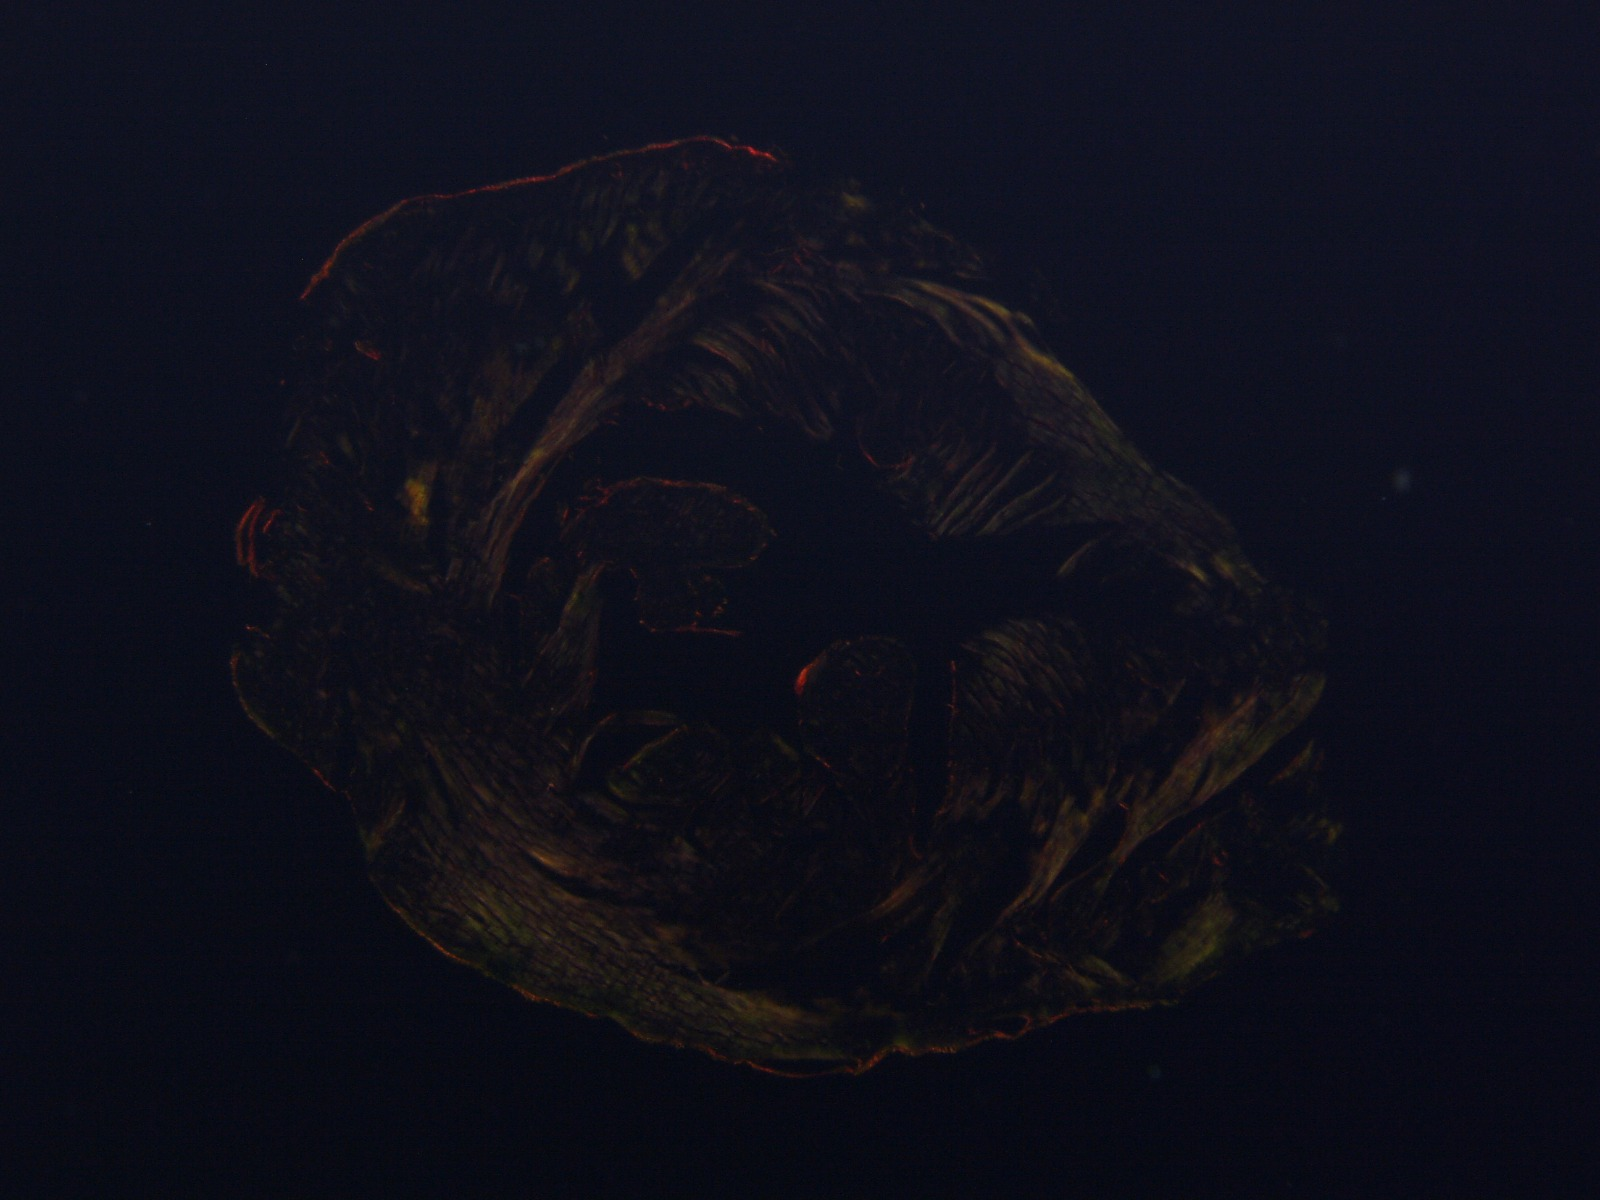

In [4]:
from IPython.display import Image

# Get the filename from the uploaded dictionary
filename = list(uploaded.keys())[0]

# Display the image
Image(filename)

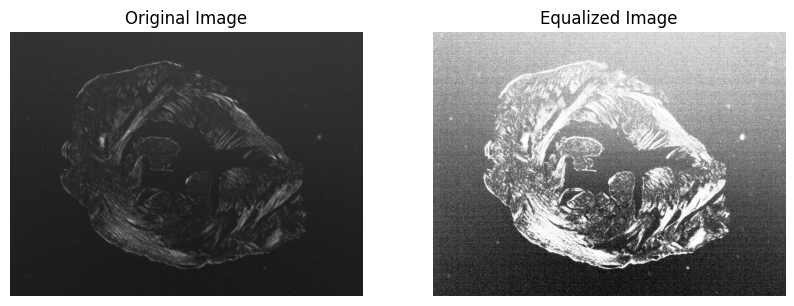

In [6]:
import cv2
import matplotlib.pyplot as plt

# Read the image in grayscale
img = cv2.imread(filename, 0)

# Apply histogram equalization
equalized_img = cv2.equalizeHist(img)

# Display original and equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

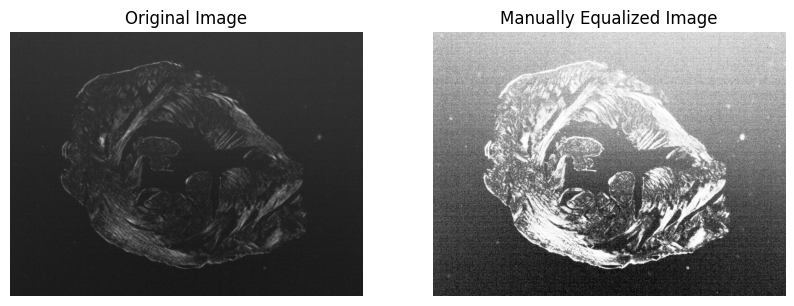

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate histogram
hist, bins = np.histogram(img.flatten(), 256, [0, 256])

# Calculate cumulative distribution function (CDF)
cdf = hist.cumsum()

# Normalize CDF
cdf_normalized = cdf * hist.max() / cdf.max()

# Mask all pixels with zero values in the CDF and normalize
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')

# Apply CDF to image to get manually equalized image
manual_equalized_img = cdf[img]

# Display original and manually equalized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(manual_equalized_img, cmap='gray')
plt.title('Manually Equalized Image')
plt.axis('off')

plt.show()

/tmp/ipython-input-3916673755.py:6: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(img.flatten(), 256, [0, 256], color='r')
/tmp/ipython-input-3916673755.py:12: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(manual_equalized_img.flatten(), 256, [0, 256], color='b')


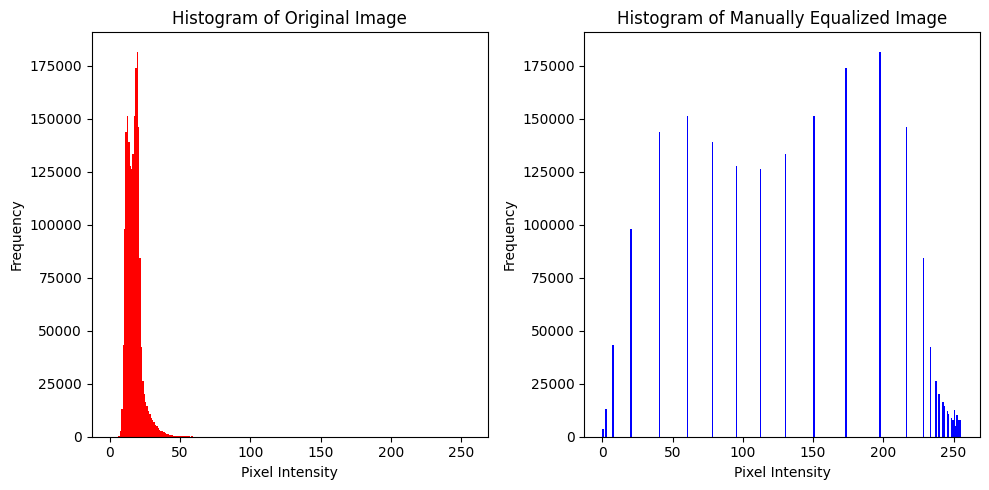

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(img.flatten(), 256, [0, 256], color='r')
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(manual_equalized_img.flatten(), 256, [0, 256], color='b')
plt.title('Histogram of Manually Equalized Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

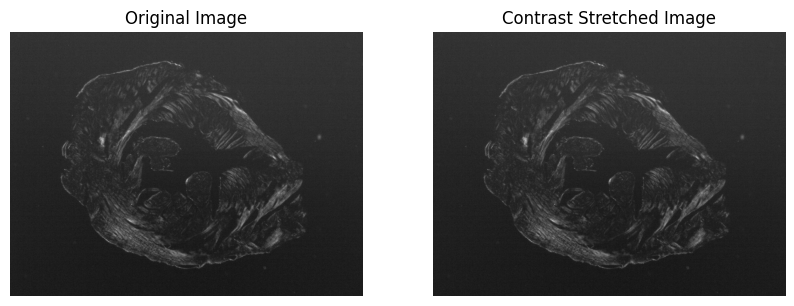

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate min and max pixel values
min_val = np.min(img)
max_val = np.max(img)

# Perform contrast stretching
stretched_img = ((img - min_val) * (255.0 / (max_val - min_val))).astype(np.uint8)

# Display original and contrast-stretched images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(stretched_img, cmap='gray')
plt.title('Contrast Stretched Image')
plt.axis('off')

plt.show()

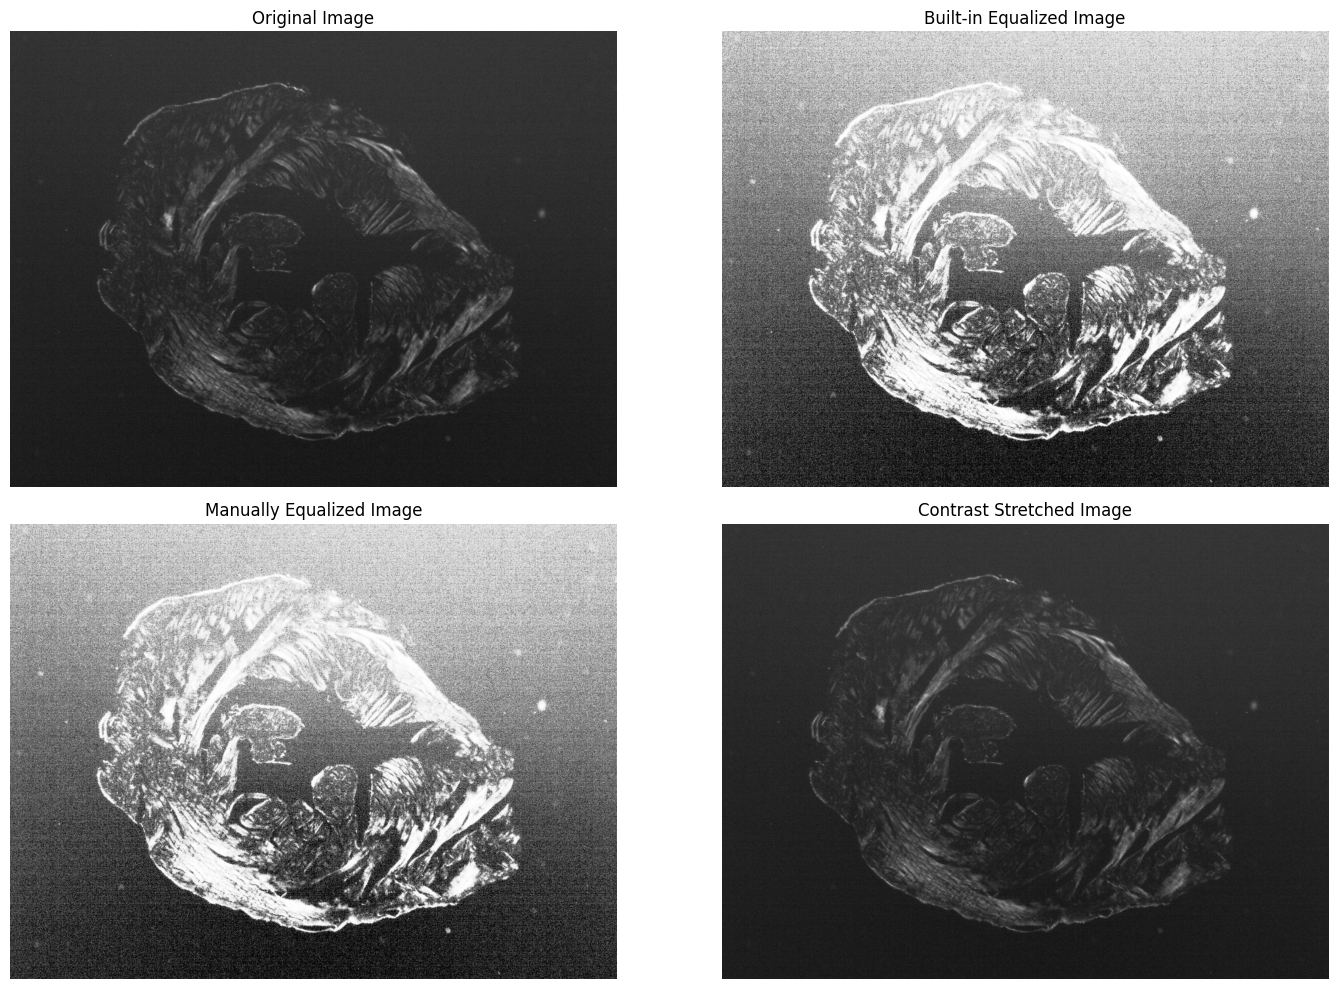

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Built-in Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(manual_equalized_img, cmap='gray')
plt.title('Manually Equalized Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(stretched_img, cmap='gray')
plt.title('Contrast Stretched Image')
plt.axis('off')

plt.tight_layout()
plt.show()